In [2]:
#Restore damaged image

import numpy as np
import cv2

img = cv2.imread('cat_damaged.png')

mask = cv2.imread('cat_mask.png', 0)

dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

cv2.imwrite('cat_inpainted.png', dst)

True

In [5]:
#Remove objects

from PIL import Image
import numpy as np	
img = Image.open(r"b.jpg").convert('RGB')
img_arr = np.array(img)
img_arr[100 : 400, 100 : 400] = (0, 0, 0)
img = Image.fromarray(img_arr)
img.show()

In [8]:
pip install tensorflow

Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step


True

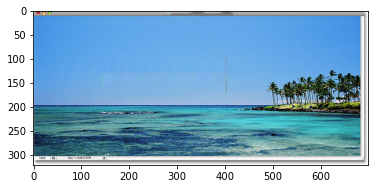

In [9]:
#Remove text

import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import tensorflow as tf
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):

    img = keras_ocr.tools.read('text.jpg')

    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]
       
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
       
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
       
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

img_text_removed = inpaint_text('../input/traffic-sign/traffic signs/1.jpg', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

In [11]:
#Remove watermark

import cv2
import numpy as np

img = cv2.imread("watermark.jpg")

alpha = 2.0
beta = -160

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)

cv2.imshow("Removed image", new)
cv2.waitKey(0)
cv2.destroyAllWindows()